# <p style="background-color:#00008B; font-family:calibri; color:white; font-size:150%; text-align:center; ">Capstone project: E-commerce Product Delivery Prediction</p>

<img src="image 2.png" width="1800">

<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">

<h3 align="left"><font color=black><b>Problem Statement:</b></font></h3>
The problem of E-commerce Product Delivery Prediction revolves around accurately estimating delivery times to enhance customer satisfaction and operational efficiency. Variability in factors such as traffic conditions, weather, logistics network complexity, and warehouse delays make this a challenging task. The objective is to develop a predictive model leveraging data like order details, customer location, shipping method, and historical delivery patterns. This model aims to improve customer experience by providing precise delivery timelines, optimize logistics operations, and reduce costs associated with delays or inefficient resource allocation.

<div style="border-radius:10px; padding: 15px; font-size:120%; text-align:left">

<h3 align="left"><font color=black><b>Objectives :</b></font></h3>

* __Analyze the Dataset__: Identify key patterns, relationships, and distributions in the data.
  
* __Perform Data Cleaning and Preparation__: Handle missing values, remove unnecessary features, treat outliers, and encode categorical data.
* __Transform Data__: Normalize or scale features and adjust skewed data for better model performance.
* __Build Predictive Models__: Develop and tune models such as Logistic Regression, Decision Trees, and Random Forest.
* __Evaluate Model Performance__: Use metrics like precision, recall, and F1-score to compare and select the best model.
* __Focus on High Accuracy__: Prioritize models that deliver consistent and reliable predictions.







<a id="contents_table"></a>
<div style="border-radius:10px; padding: 15px; background-color: #facf8; font-size:115%; text-align:left">
<h3 align="left"><b>Table of Contents:</b></font></h3>

* [Step 1 | Importing Libraries](#import)
* [Step 2 | Data Analysis](#analysis)
* [Step 3 | Data Cleaning](#cleaning)
* [Step 4 | Data Preprocessing](#preprocessing)
* [Step 5 | Exploratory Data Analysis](#eda)
    - [5.1 | Boxplot](#boxplot)
    - [5.2 | Scatterplot](#scatterplot)
    - [5.3 | Heatmap](#heatmap)
    - [5.4 | Pie chart](#piechart)
    - [5.5 | HistPlot](#histplot)
    - [5.6 | Countplot](#countplot)
    - [5.7 | Violinplot](#violinplot)
* [Step 6 | Train Test Split](#traintestsplit)
* [Step 7 | Label Encoding](#label_encoding)
* [Step 8 | Feature Scaling](#feature_scaling)
* [Step 9 | Model Building](#model_building)
    - [9.1 | Random Forest Classifier](#rf)
    - [9.2 | Hyperparameter Tuning](#rf_tuning)
    - [9.3 | Decision Tree Classifier](#dt)
    - [9.4 | Logistic Regression](#logistic)
    - [9.5 | KNeighborsClassifier](#knn)
* [Step 10 | Model Training and Evaluation](#evaluation)
* [Step 11 | Model Comparison](#comparison)
* [Step 12 | Conclusion](#conclusion)
</div>


<h1 align="left"><font color=#00008B><b>Let's get started:</b></font></h1>

<a id="import"></a>
# <p style="background-color:#00008B; font-family:calibri; color:white; font-size:150%; text-align:center;">Step 1 | Importing Libraries</p>
⬆️ [Table of Contents](#contents_table)

In [8]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Model Evaluation
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, 
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,
)

# Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Dealing with Imbalanced Data
from imblearn.over_sampling import SMOTE  # For classification tasks with imbalanced classes

# Handling Warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Reading the CSV file:
df=pd.read_csv("E_Commerce.csv")
df.head(10)
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


## Dataset Overview:
* __ID__: Unique identifier for each customer.
* __Warehouse Block__: Divisions of the warehouse into blocks (A, B, C, D, E).
* __Mode of Shipment__: Shipping methods include Ship, Flight, and Road.
* __Customer Care Calls__: Number of customer inquiries related to the shipment.
* __Customer Rating__: Ratings given by customers (1 - Worst, 5 - Best).
* __Cost of the Product__: Price of the product in US Dollars.
* __Prior Purchases__: Number of previous purchases by the customer.
* __Product Importance__: Categorization of products (Low, Medium, High).
* __Reached on Time__(Target Variable): Indicates delivery status (1 = Late, 0 = OnTime).



<a id="analysis"></a>
# <p style="background-color:#00008B; font-family:calibri; color:white; font-size:150%; text-align:center;">Step 2 | Data Analysis</p>
⬆️ [Table of Contents](#contents_table)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [13]:
df.info

<bound method DataFrame.info of           ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   

Validate Data Formats
Ensure that data types match the expected format:

In [15]:
print(df.dtypes)

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object


In [16]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Helps to find mean, std, count

In [18]:
df.shape

(10999, 12)

In [19]:
df.value_counts

<bound method DataFrame.value_counts of           ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177            

<a id="cleaning"></a>
# <p style="background-color:#00008B; font-family:calibri; color:white; font-size:150%; text-align:center;">Step 3 | Data Cleaning</p>
⬆️ [Table of Contents](#contents_table)


__Data Cleaning Steps:__

* __Drop Unwanted Columns__: Unqiues columns are droped.  
* __Check for Missing Values__: Ensure there are no missing values in the dataset.
* __Check for Duplicates__: Identify and remove duplicate rows.
* __Validate Data Types__: Verify that the data types align with the expected formats.
* __Standardize Categories__: Ensure categorical values (Warehouse_block, Mode_of_Shipment, etc.) are consistent..

### Drop Unwanted Columns

In [23]:
df.drop('ID',axis=1, inplace=True)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


__The ID column is unique for each row and does not provide meaningful information for modeling or statistical analysis.
Including it in machine learning models might introduce noise or lead the model to overfit.__

### Check for Missing Values

In [26]:
# Check for missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

__No missing values found__

### Check for Duplicates

In [29]:
# Checking for duplicate values:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

__No duplicate Values__

### Validate Data Types

In [32]:
# Checking for inconsistencies:
# Check unique values in categorical columns
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for column in categorical_columns:
    unique_values = sorted(df[column].unique())  # Sorting unique values alphabetically
    print(f"{column} unique values (sorted): {unique_values}")

Warehouse_block unique values (sorted): ['A', 'B', 'C', 'D', 'F']
Mode_of_Shipment unique values (sorted): ['Flight', 'Road', 'Ship']
Product_importance unique values (sorted): ['high', 'low', 'medium']
Gender unique values (sorted): ['F', 'M']



__Categorical Data:__

1. Warehouse_block: Values are consistent (A, B, C, D, F)
2. Mode_of_Shipment: Values are consistent (Flight, Ship, Road).
3. Product_importance: Values are consistent (low, medium, high).
4. Gender: Values are consistent (F, M).

<a id="preprocessing"></a>
# <p style="background-color:#00008B; font-family:calibri; color:white; font-size:150%; text-align:center;">Step 4 | Data Preprocessing</p>
⬆️ [Table of Contents](#contents_table)


__Data Preprocessing Steps:__

* __Encoding__: Converts categorical data into numerical formats using methods like One-Hot Encoding, Label Encoding, or Binary Encoding.
* __Outlier Detection__: Identifies and handles data points significantly different from others.
* __Train Test Split__: Divides the dataset into training and testing subsets (e.g., 80-20 or 70-30 split).
* __Feature Scaling__: Adjusts numerical data to a uniform scale for consistency in model training.

### Encoding

In [37]:
# Perform one-hot encoding using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'])
df_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,False,False,False,True,False,True,False,False,False,True,False,True,False
1,4,5,216,2,59,3088,1,False,False,False,False,True,True,False,False,False,True,False,False,True
2,2,2,183,4,48,3374,1,True,False,False,False,False,True,False,False,False,True,False,False,True
3,3,3,176,4,10,1177,1,False,True,False,False,False,True,False,False,False,False,True,False,True
4,2,2,184,3,46,2484,1,False,False,True,False,False,True,False,False,False,False,True,True,False


__One-hot encoding converts categorical variables into binary columns, allowing machine learning models to process them by representing each category with a 0 or 1 or True or False.__

### Identify Outliers

In [40]:
# Identify outliers using the interquartile range (IQR) method
Q1 = df['Discount_offered'].quantile(0.25)
Q3 = df['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Discount_offered'] < (Q1 - 1.5 * IQR)) | (df['Discount_offered'] > (Q3 + 1.5 * IQR))]
outliers

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
7,F,Flight,4,1,233,2,low,F,48,2804,1
...,...,...,...,...,...,...,...,...,...,...,...
3128,A,Road,3,1,169,3,high,M,24,1740,1
3130,C,Road,6,5,246,4,medium,M,50,3618,1
3131,F,Road,4,1,232,3,medium,M,55,2686,1
3132,D,Road,3,5,251,3,low,F,21,2476,1


In [41]:
# Removing outliers based on the IQR method
cleaned_data = df[(df['Discount_offered'] >= (Q1 - 1.5 * IQR)) & (df['Discount_offered'] <= (Q3 + 1.5 * IQR))]
df=cleaned_data
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,B,Flight,3,3,176,4,medium,M,10,1177,1
5,F,Flight,3,1,162,3,medium,F,12,1417,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
8,A,Flight,3,4,150,3,low,F,11,1861,1
10,C,Flight,3,4,189,2,medium,M,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


__Cleaned Data__

<a id="eda"></a>
# <p style="background-color:#00008B; font-family:calibri; color:white; font-size:150%; text-align:center;">Step 5 | Exploratory Data Analysis</p>
⬆️ [Table of Contents](#contents_table)



<a id="boxplot"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">5.1 | Boxplot</p>
⬆️ [Table of Contents](#contents_table)


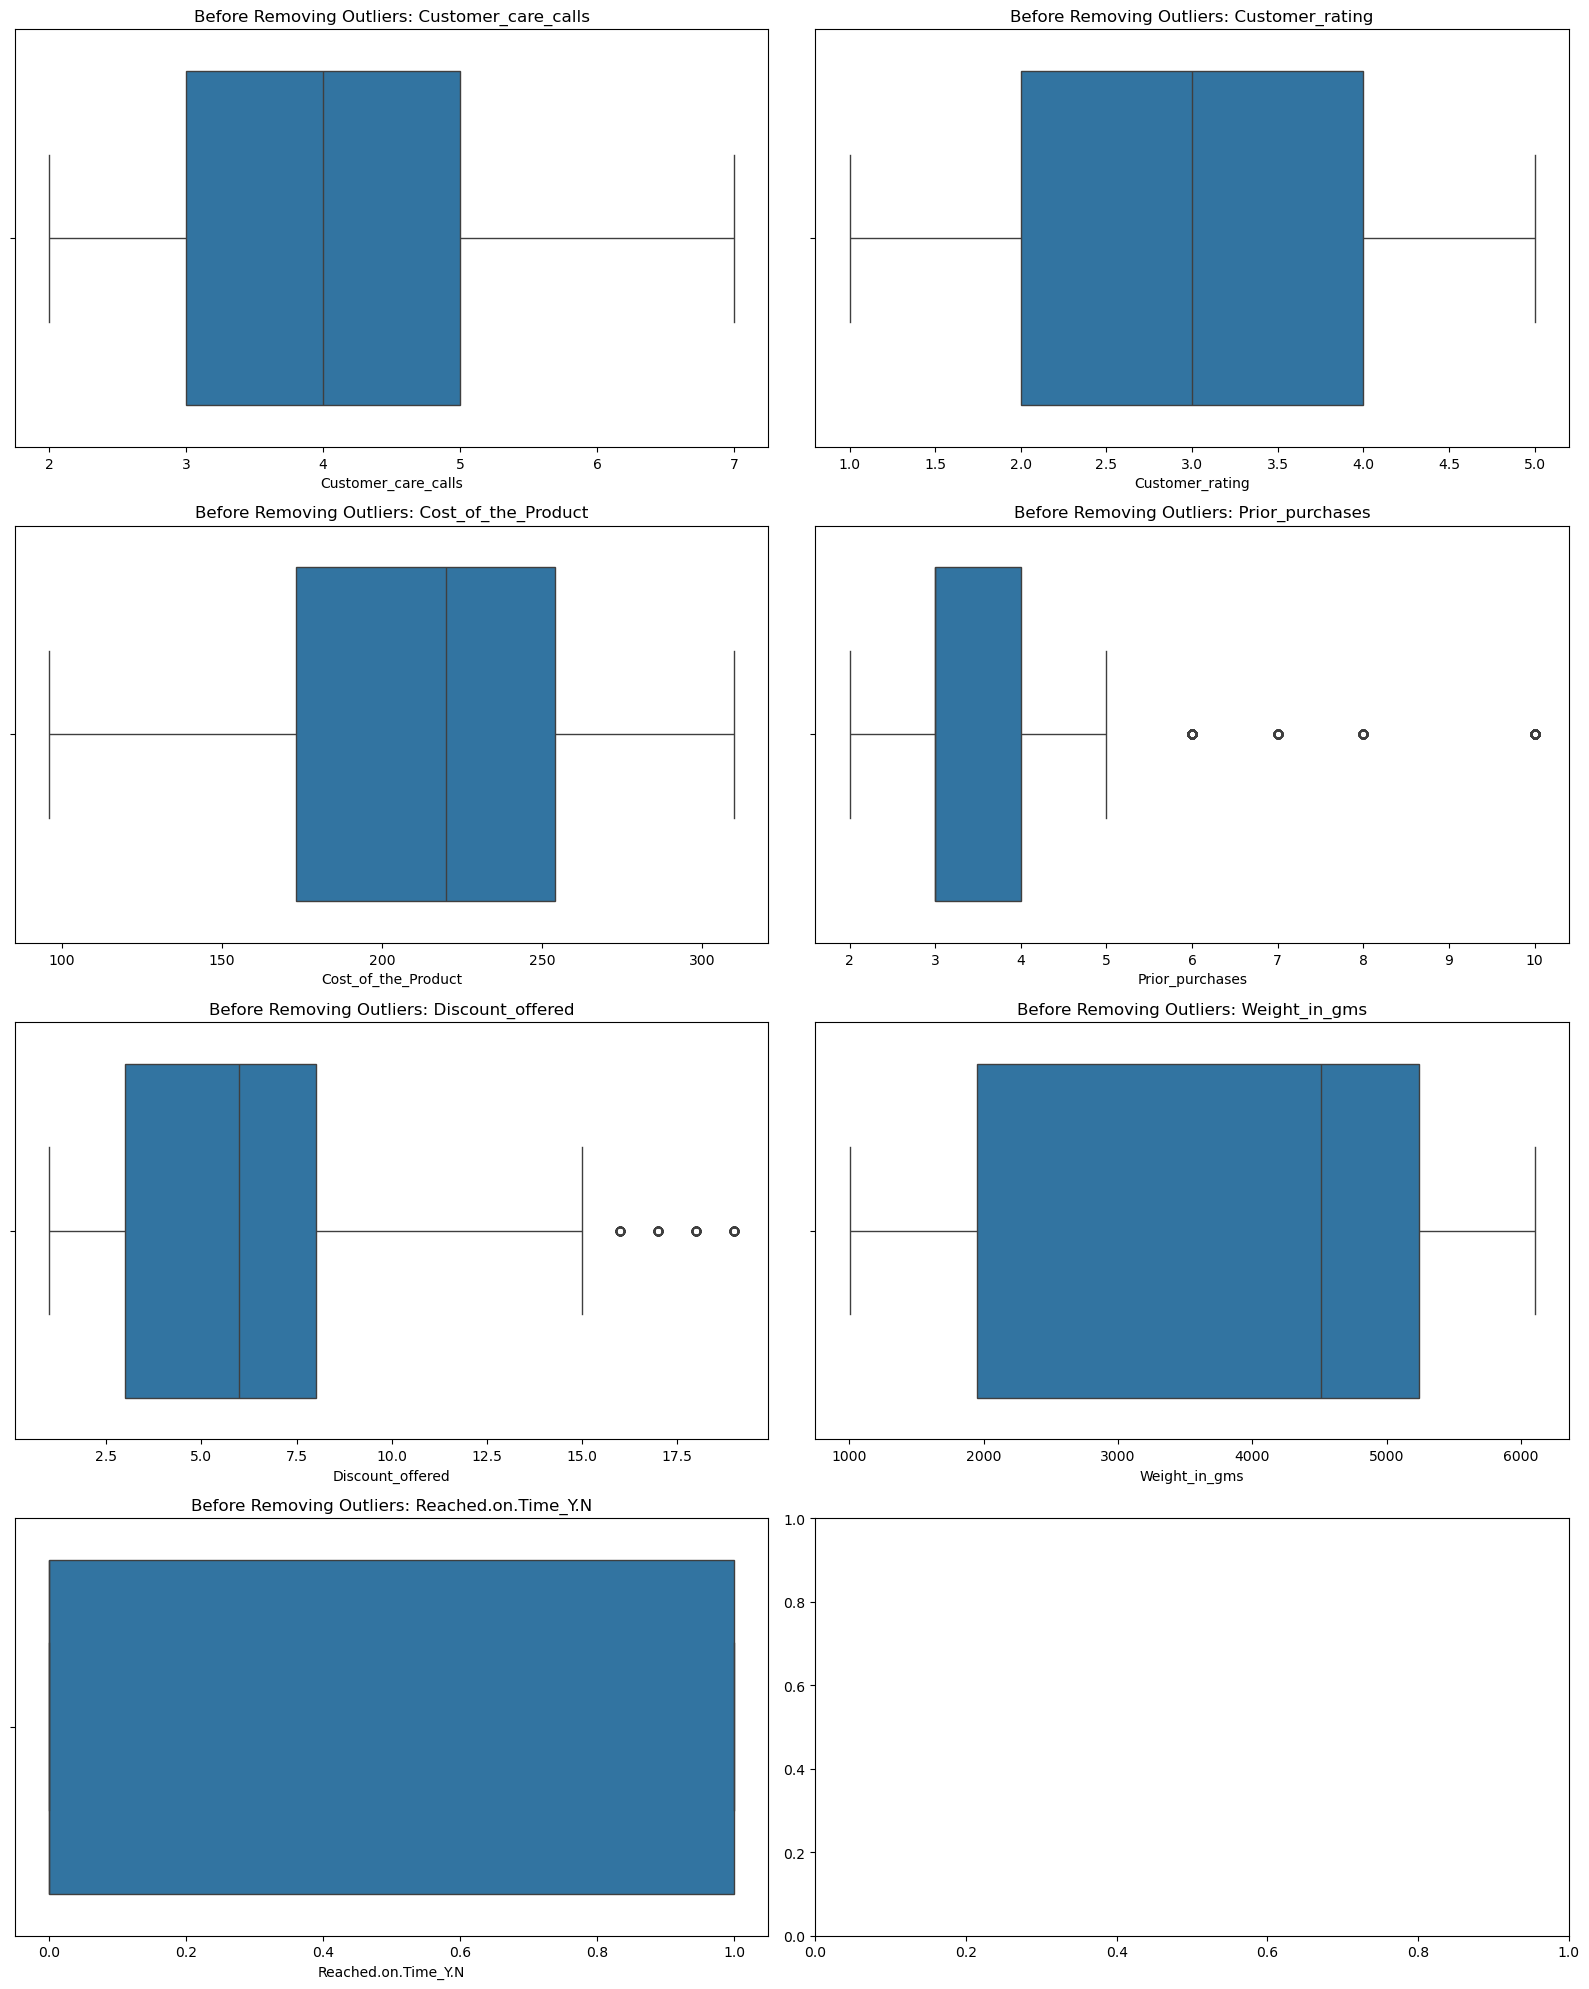

In [45]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for the subplots
num_cols = 2  # Keep 2 columns
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows required

# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Identify outliers
    return (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))

# Boxplot before removing outliers
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))
axes = axes.flatten()  # Flatten to make iterating easier

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Before Removing Outliers: {col}')
    
plt.tight_layout()
plt.show()

Prior Purchases and discount Shows the number of prior purchases, with some dots above the boxplot representing potential outliers (values much higher than the rest of the data).



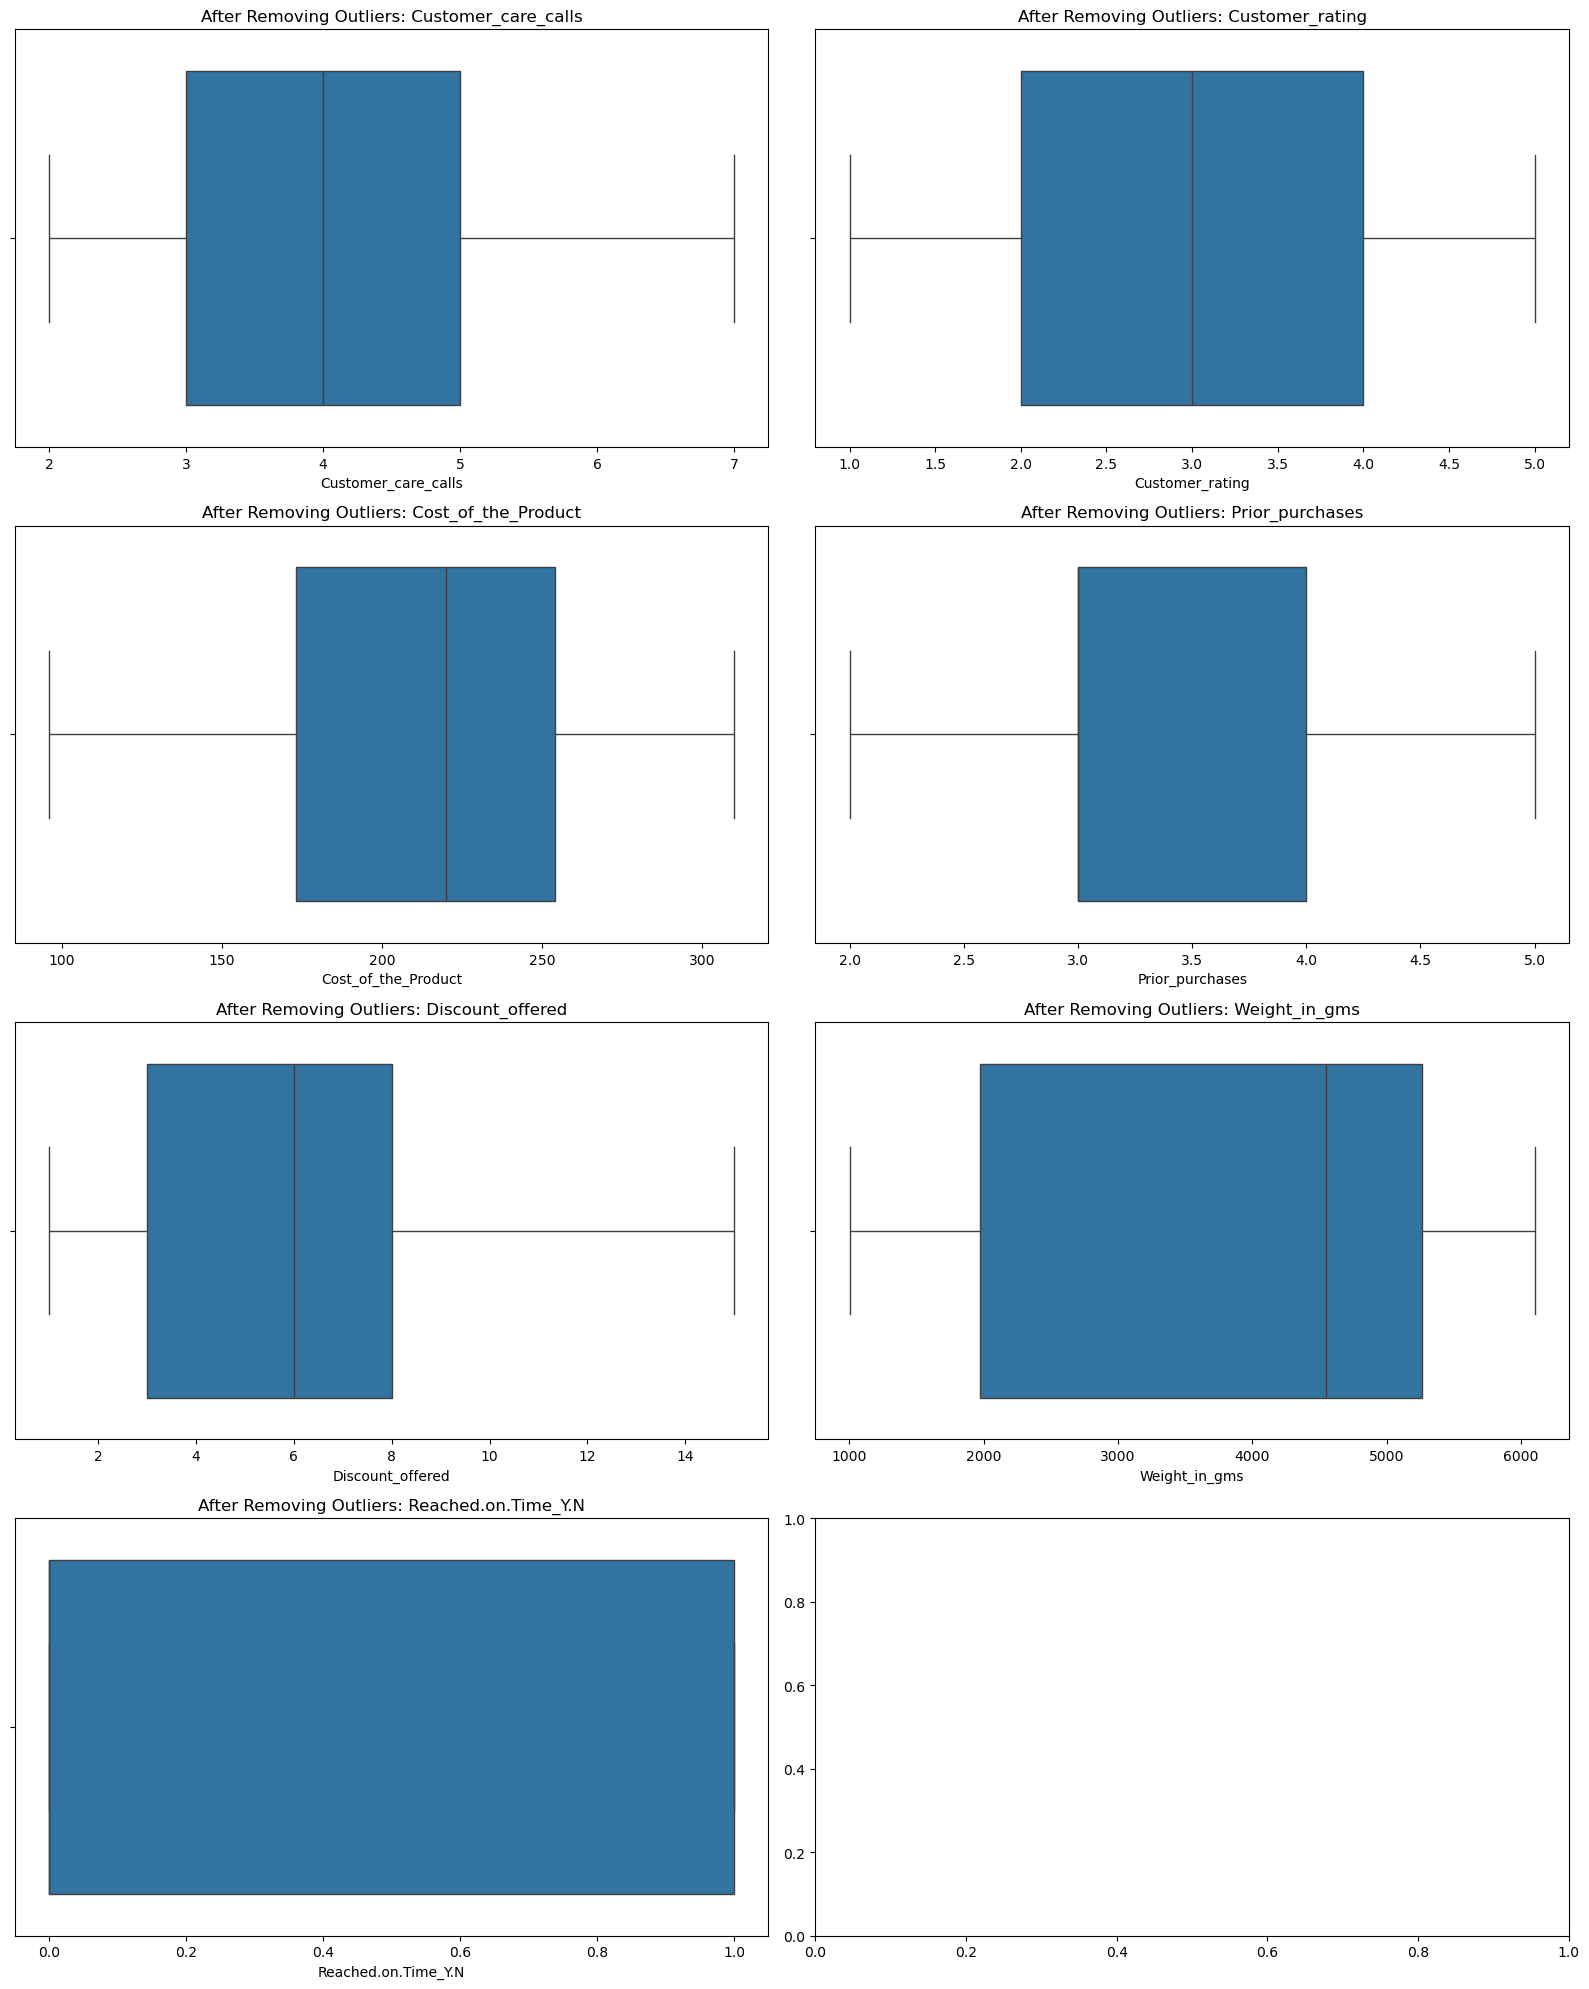

In [47]:
# Remove outliers
df_no_outliers = df[~df[numerical_columns].apply(lambda x: detect_outliers(df, x.name)).any(axis=1)]

# Boxplot after removing outliers
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))
axes = axes.flatten()  # Flatten to make iterating easier

# Plot boxplots for each numerical column after removing outliers
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_no_outliers[col], ax=axes[i])
    axes[i].set_title(f'After Removing Outliers: {col}')

plt.tight_layout()
plt.show()


<a id="scatterplot"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">5.2 | Sactterplot</p>
⬆️ [Table of Contents](#contents_table)


<a id="heatmap"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">5.3 | Heatmap</p>
⬆️ [Table of Contents](#contents_table)


In [50]:
#Label encoding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())


Warehouse_block [1 4 3 0 2]
Mode_of_Shipment [0 2 1]
Product_importance [2 1 0]
Gender [1 0]


<Axes: >

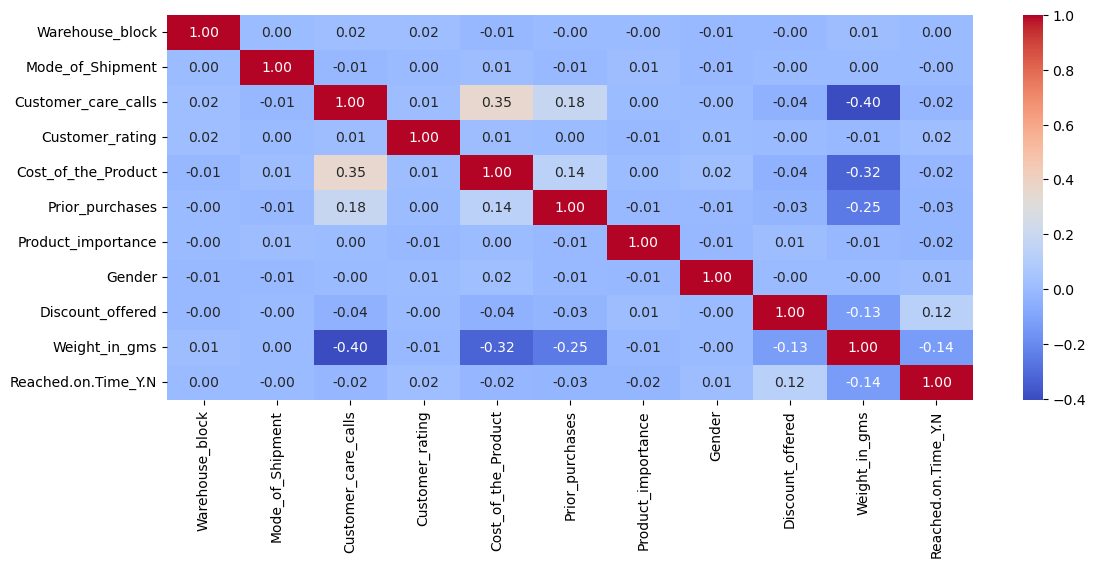

In [51]:
plt.figure(figsize=(13,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")

Each variable has a perfect correlation with itself (1.0), shown by the red diagonal.

The correlation matrix heatmap shows a positive correlation between the product's cost and the number of customer care calls.

Variables like Gender, Product_importance, and Warehouse_block show weak or negligible correlation with Reached_on_Time_Y_N and other factors.

Strong negative corelation between weight of product and customer care calls


<a id="piechart"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">5.4 | Piechart</p>
⬆️ [Table of Contents](#contents_table)

Text(0.5, 1.0, 'Gender Distribution')

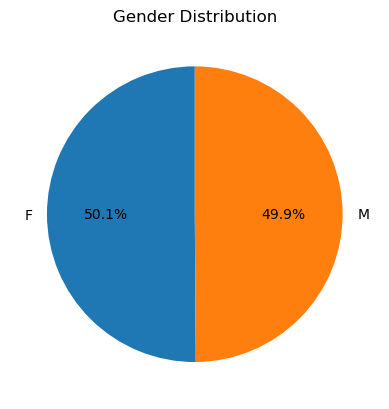

In [54]:
plt.pie(df["Gender"].value_counts(),labels=['F','M'], startangle=90, autopct='%1.1f%%')
plt.title("Gender Distribution")

We can see that we have equal number of males and females

In [56]:
print(df['Mode_of_Shipment'].value_counts())

Mode_of_Shipment
2    5961
0    1426
1    1403
Name: count, dtype: int64


Text(0.5, 1.0, 'Mode Of Shipment')

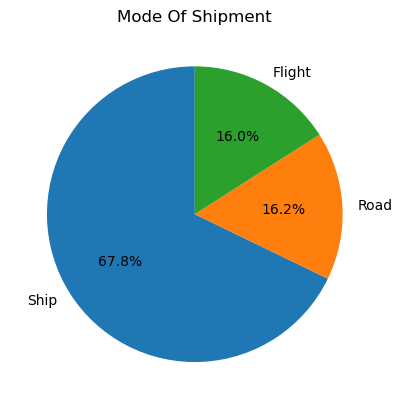

In [57]:
plt.pie(df["Mode_of_Shipment"].value_counts(),labels=["Ship","Road","Flight"], startangle=90, autopct="%1.1f%%")
plt.title("Mode Of Shipment")

__Mode_of_Shipment:__

* Flight    7462
* Ship      1777
* Road      1760

In [59]:
# Numerical feature distributions
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
# Categorical features
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


<a id="histplot"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">5.5 | Histplot</p>
⬆️ [Table of Contents](#contents_table)

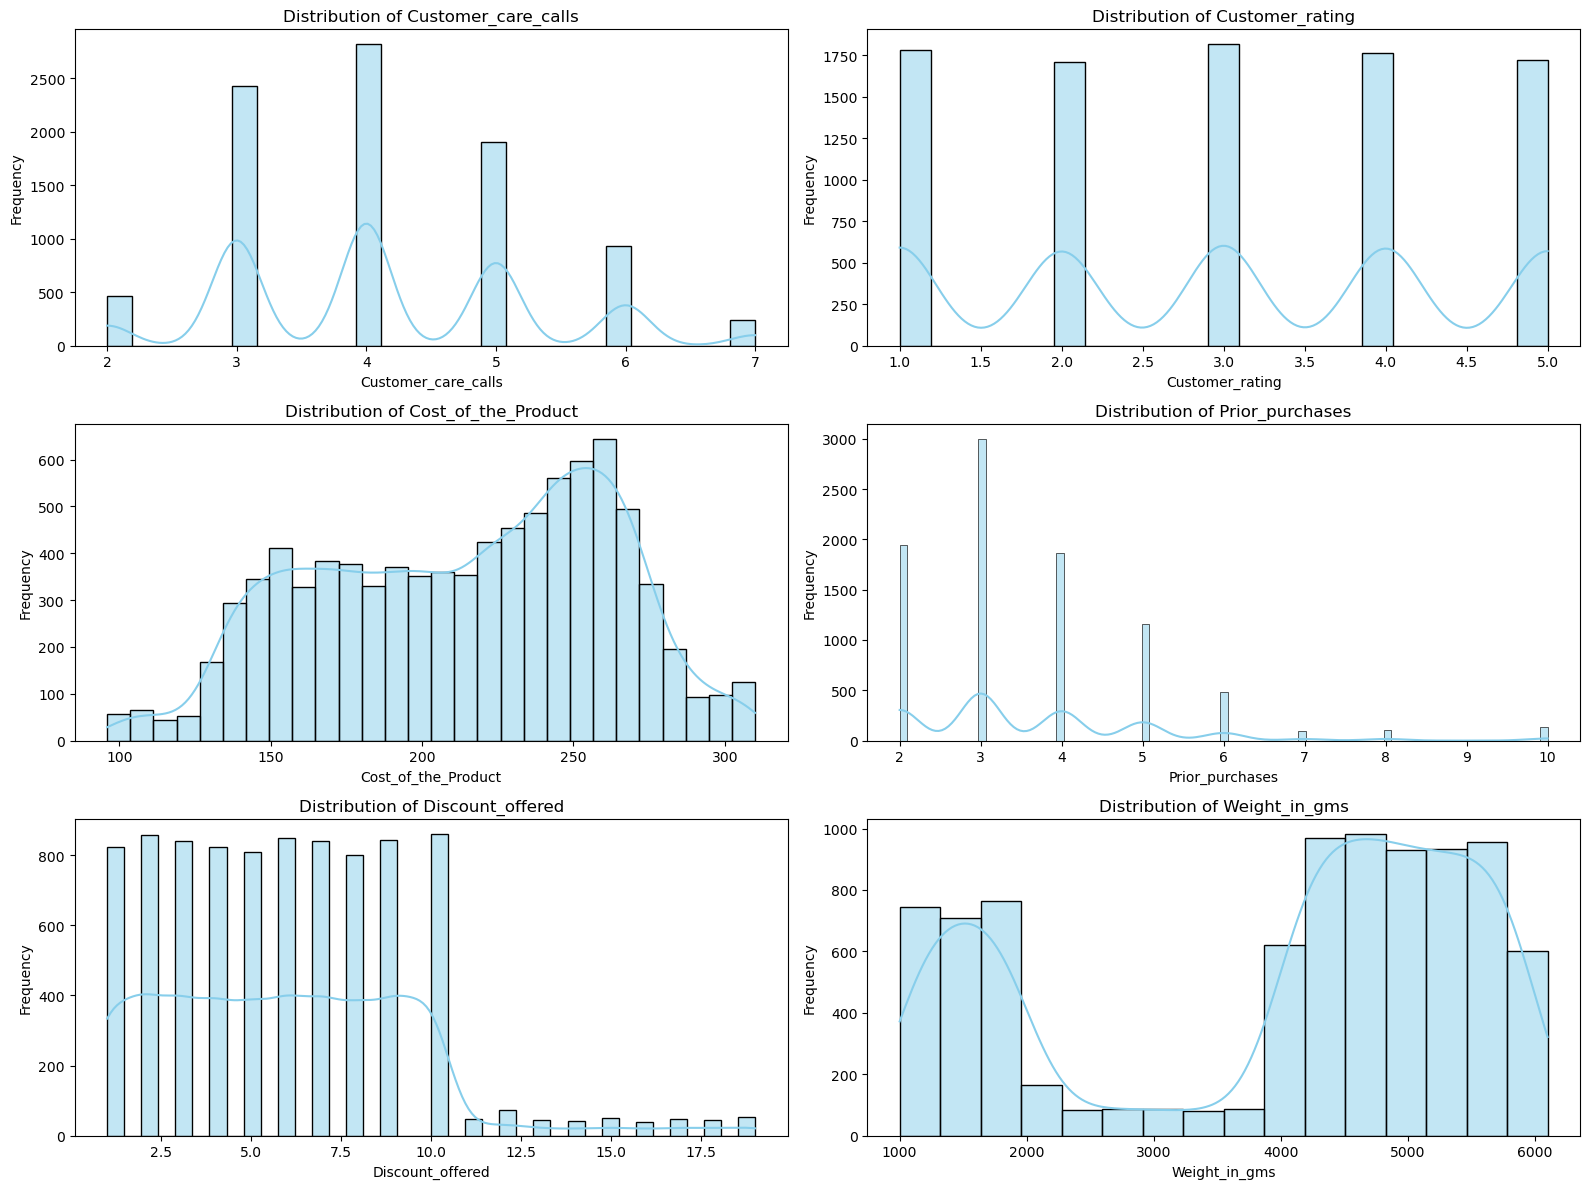

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color="skyblue")#KDE=Kernel Density Function
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

__Summary:__

* __Customer Care Calls__: The distribution is slightly skewed, with some customers making more calls than others.
* __Customer Rating__: Appears evenly distributed, likely ordinal in nature.
* __Cost of the Product__: Shows a near-normal distribution centered around the midrange values.
* __Prior Purchases__: Most customers seem to have made fewer prior purchases.
* __Discount Offered__: Has a pronounced skew, with many cases receiving no or minimal discounts.
* __Weight in gms__: Appears normally distributed.

<a id="countplot"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">5.6 | Countplot</p>
⬆️ [Table of Contents](#contents_table)

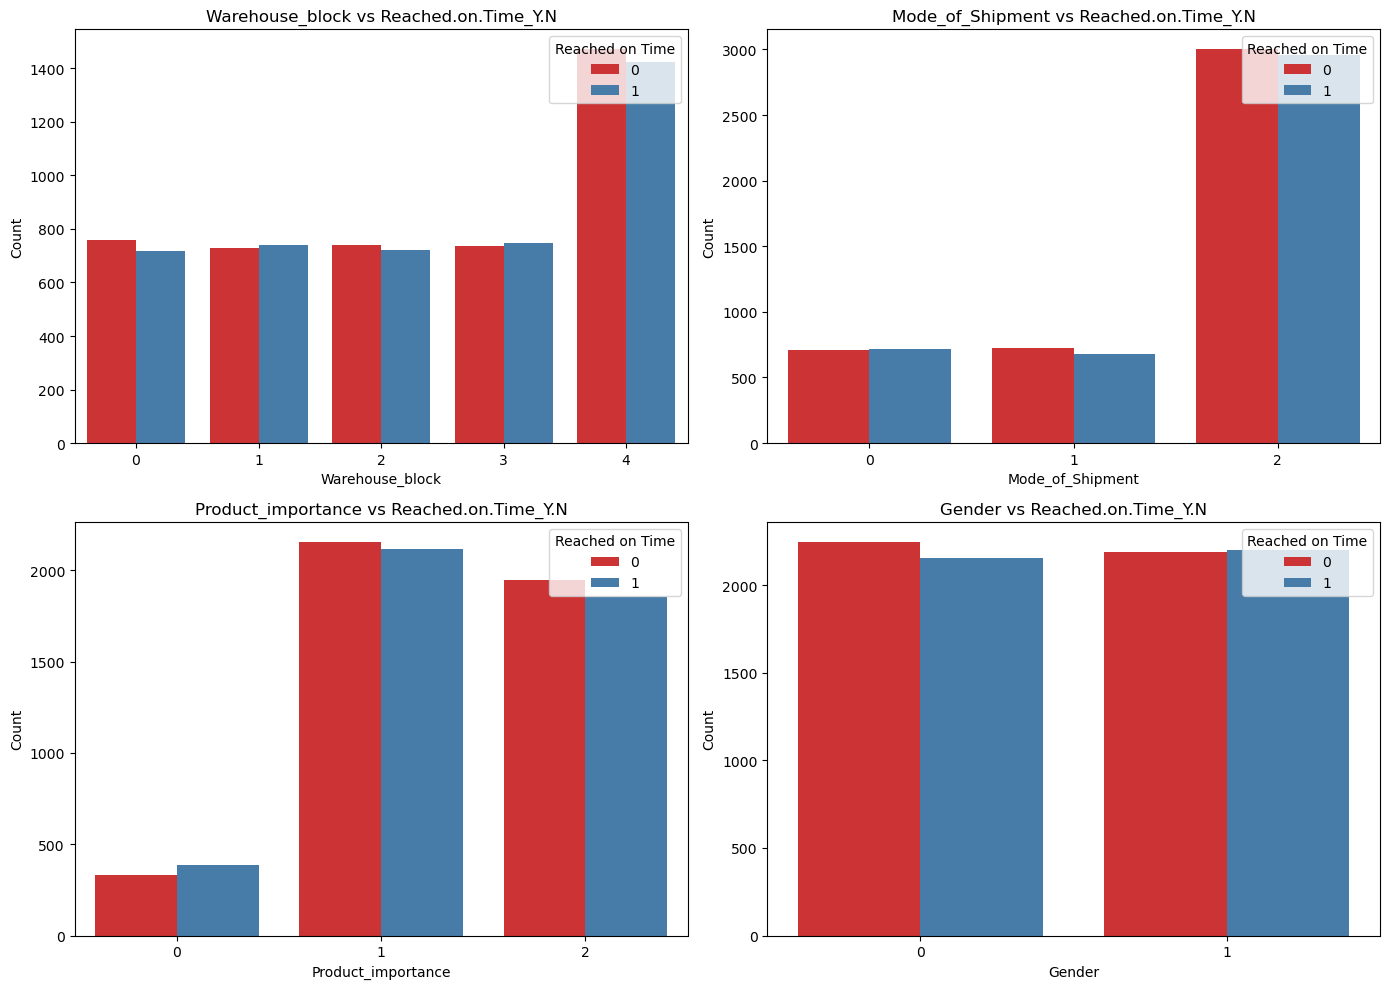

In [64]:
target = 'Reached.on.Time_Y.N'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue=target, data=df, ax=axes[i], palette="Set1")
    axes[i].set_title(f"{feature} vs {target}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Reached on Time", loc='upper right')

plt.tight_layout()
plt.show()

The bar plots highlight how each categorical feature relates to the target variable (Reached.on.Time_Y.N):

* __Warehouse Block__: Some blocks (e.g., "A", "B") show more delayed deliveries compared to others.    
* __Mode of Shipment__: Different shipment methods have varying delay rates, with certain modes (e.g., "Flight") showing fewer delays.
* __Product Importance__: Products marked as "low" or "medium" importance have a higher proportion of delays compared to "high."
* __Gender__: The gender of the customer does not appear to significantly influence delivery timing.

Text(0.5, 1.0, 'Cost of the Product')

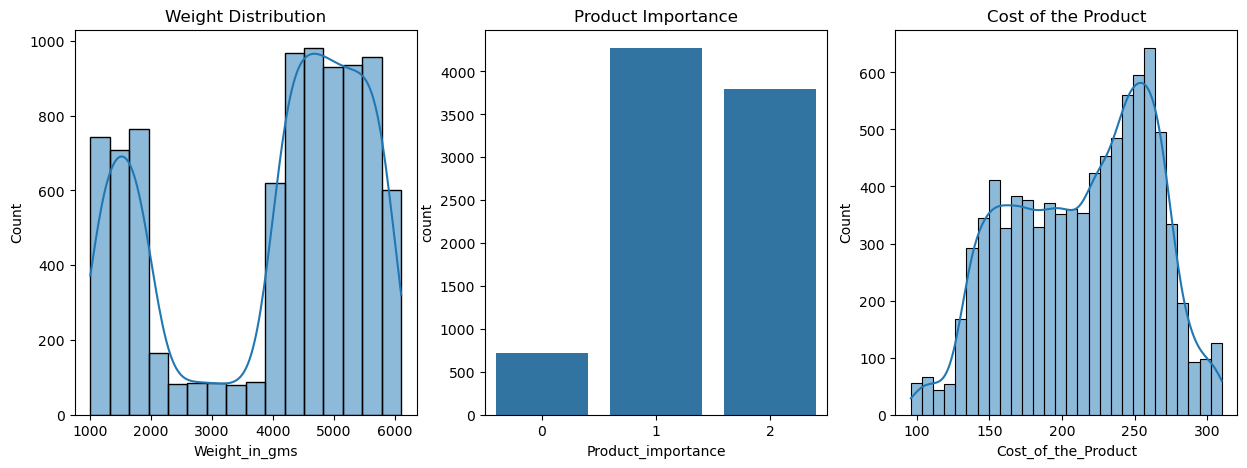

In [66]:
# Product details:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

__Product characteristics__
* __First graph__ shows that products primarily weigh between 1000-2000 grams and 4000-6000 grams, indicating that these weight categories are more prevalent in the company's sales. 
* __Second graph__ which represents product importance, we observe that most products are categorized as having low or medium importance. 
* __Third graph__ focuses on the cost distribution, highlighting a higher frequency of products priced between 150-200 and 225-275 dollars. 

Text(0.5, 1.0, 'Reached on Time')

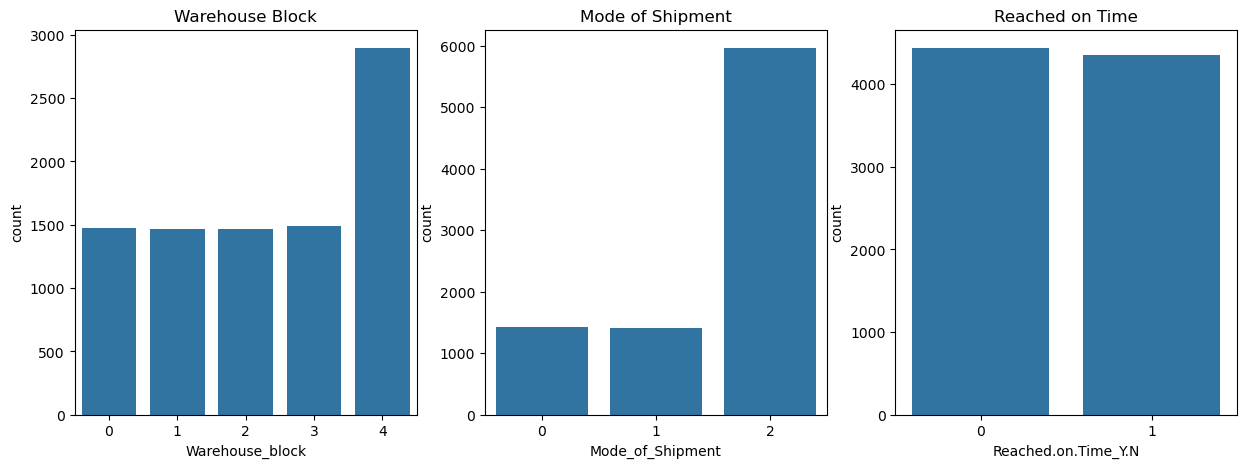

In [68]:
# Logistics
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')

* __First graph__ indicates that warehouse F handles the most products, around 3500, while the other warehouses manage a comparable and lower number of products. 
* __Second graph__ displays the shipping methods, revealing that the majority of products are transported by ship, with about 2000 products shipped via flight and road.
* __Third graph__ illustrates delivery timeliness, showing a higher quantity of products delivered on time compared to those that are late.


Text(0.5, 1.0, 'Discount Offered')

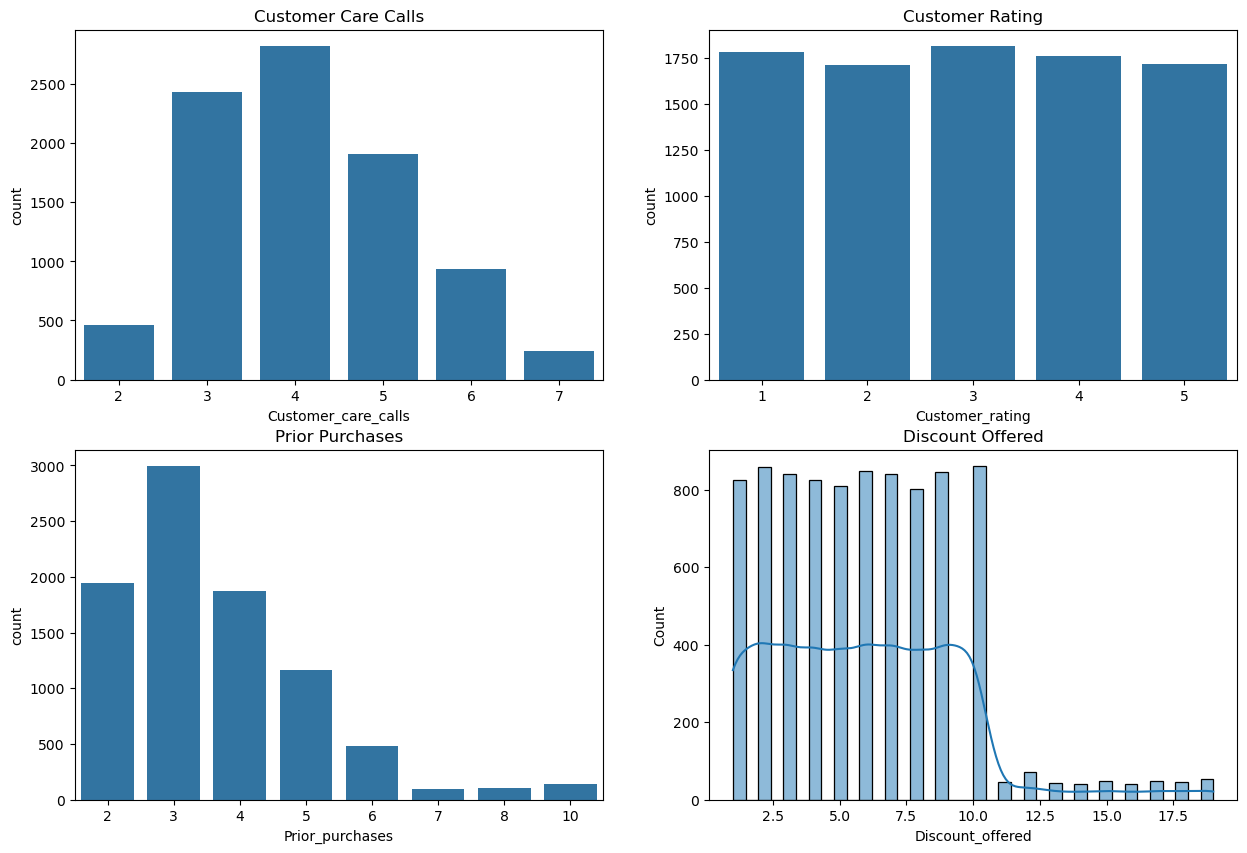

In [70]:
# Customer Experience:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

* __First graph__ indicates that most customers make 3-4 customer care calls, suggesting possible issues with product delivery. 
* __Second graph__ shows an even distribution of customer ratings, with a slight increase in 1-star ratings, hinting at some level of dissatisfaction with the service.
* __Third graph__ reveals that a majority of customers have made 2-3 prior purchases, indicating that repeat customers are generally satisfied with the service and continue to engage with the company. 
* __Fourth graph__ displays the distribution of discounts, with most products receiving a 0-10% discount, suggesting that the company offers limited discounts on its products.


Text(0.5, 1.0, 'Prior Purchases')

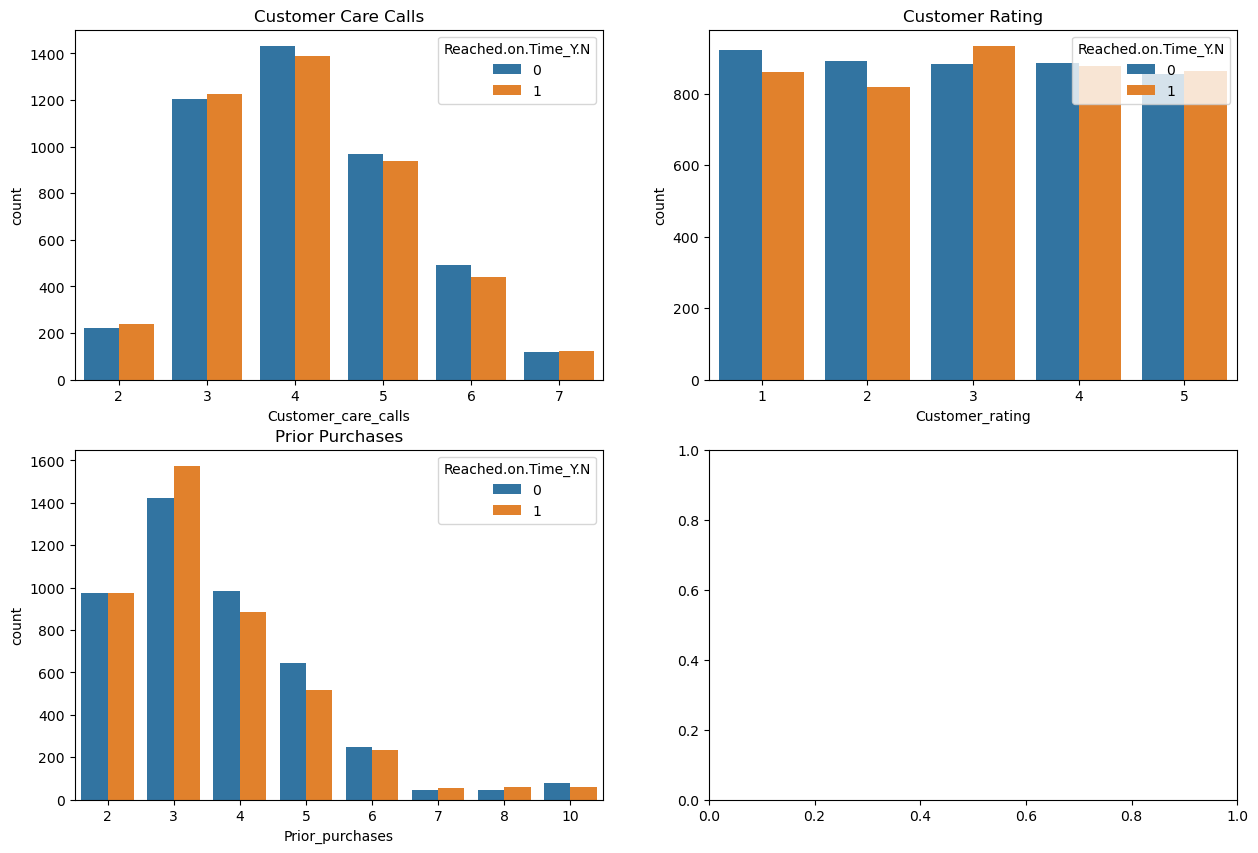

In [72]:
#Customer Experience and Product Delivery

fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')


* __First graph__ shows that as customer care calls increase, on-time deliveries decrease, suggesting customers call more when deliveries are late. 
* __Second graph__ indicates that customers with higher ratings often receive their products on time. 
* __Third graph__ reveals that customers who make repeat purchases tend to receive their products on time, likely encouraging their continued business. 


<a id="violinplot"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">5.7 | Violin plot</p>
⬆️ [Table of Contents](#contents_table)

Text(0.5, 1.0, 'Discount Offered')

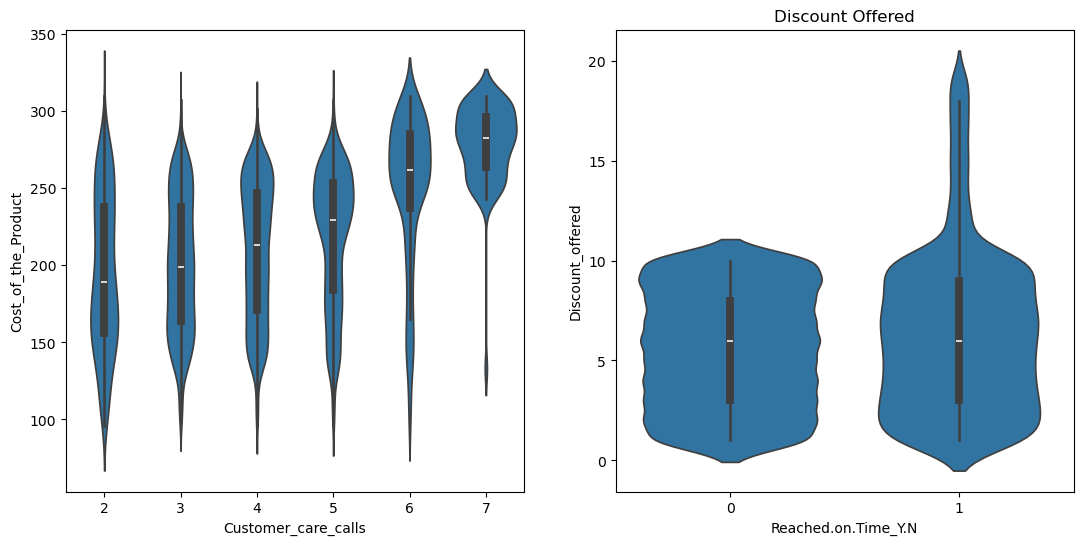

In [75]:
fig, ax = plt.subplots(1,2,figsize=(13,6))
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df,ax=ax[0])
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1]).set_title('Discount Offered')

__Customers tend to be more concerned about delivery when the product is expensive, leading to more customer service calls to check on the product's status. Therefore, ensuring timely delivery is crucial for high-cost items.__


<a id="traintestsplit"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">6 | Train Test Split</p>
⬆️ [Table of Contents](#contents_table)

In [78]:
# Train Test Split:
X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

Training Set Shape: (6153, 10)
Testing Set Shape: (2637, 10)


<a id="label_encoding"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">7 | Label Encoding</p>
⬆️ [Table of Contents](#contents_table)

In [80]:
#Label encoding object
# Recreate Label Encoders
mode_of_shipment_encoder = LabelEncoder()
mode_of_shipment_encoder.classes_ = ["Flight", "Ship", "Road"]  # Add all classes

warehouse_block_encoder = LabelEncoder()
warehouse_block_encoder.classes_ = ["A", "B", "C", "D", "F"]  # Add all classes

print("Mode of Shipment Encoder Classes:", mode_of_shipment_encoder.classes_)

# Check Warehouse Block Encoder classes
print("Warehouse Block Encoder Classes:", warehouse_block_encoder.classes_)

Mode of Shipment Encoder Classes: ['Flight', 'Ship', 'Road']
Warehouse Block Encoder Classes: ['A', 'B', 'C', 'D', 'F']


<a id="feature_scaling"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">8 | Feature Scaling</p>
⬆️ [Table of Contents](#contents_table)

In [82]:
# Scaling Numerical Data:

# Features to scale
features_to_scale = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

# Initialize scaler
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check scaled data
print(df[features_to_scale].head())

    Cost_of_the_Product  Discount_offered  Weight_in_gms
3             -0.785046          1.142258      -1.712137
5             -1.076270          1.709851      -1.564028
6              0.754277         -0.844319      -0.975298
8             -1.325890          1.426054      -1.290028
10            -0.514625          1.709851      -0.656249


<a id="model_building"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">9 | Model Building</p>
⬆️ [Table of Contents](#contents_table)

### 1. Random Forest Classifier Object

In [ ]:
rfc = RandomForestClassifier()
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)
rfc.fit(X_train, y_train)

### Hyperparameter tuning

In [ ]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits


### 2. Decision Tree classifier

In [ ]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')
dtc.fit(X_train, y_train)

### 3. Logistic Regression:

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

### 4. KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

In [ ]:
svm_model=SVC()
svm_model.fit(X_train,y_train)

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  # For binary classification
    max_depth=5,                 # Maximum depth of trees
    learning_rate=0.1,           # Step size for updating weights
    n_estimators=100,            # Number of trees
    use_label_encoder=False,     # Suppress label encoding warnings
    eval_metric='logloss'        # Evaluation metric
)
xgb_model.fit(X_train, y_train)

<a id="evaluation"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">10 | Model Training and Evaluation</p>
⬆️ [Table of Contents](#contents_table)

In [ ]:
# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector": SVC(),
    "XGBoost": xgb.XGBClassifier()
}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

In [ ]:
rfc_pred = rfc.predict(X_test)
dtc_pred = dtc.predict(X_test)
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred=svm_model.predict(X_test)
xgb_pred=xgb_model.predict(X_test)

fig, ax = plt.subplots(3,2,figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[2,0]).set_title('SVM Classifier')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[2,1]).set_title('XGBoost Classifier')


<a id="comparison"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">11 | Model Comparision</p>
⬆️ [Table of Contents](#contents_table)

In [ ]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier',"Support Vector Machine", "XGBoost"]
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred),accuracy_score(y_test, svm_pred),accuracy_score(y_test, xgb_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.2f}")
    print(" ")

In [ ]:
# Random Forest Classifier
evaluate_model(y_test, rfc_pred, "Random Forest Classifier")

# Decision Tree Classifier
evaluate_model(y_test, dtc_pred, "Decision Tree Classifier")

# Logistic Regression
evaluate_model(y_test, lr_pred, "Logistic Regression")

# K Nearest Neighbors
evaluate_model(y_test, knn_pred, "K Nearest Neighbors")

evaluate_model(y_test, svm_pred, "Support Vector Machine")

evaluate_model(y_test, xgb_pred, "XG Boost Classifier")

In [ ]:
import pickle
with open ('model_pickle','wb') as f:
    pickle.dump(model,f)

with open('model_pickle','rb') as f:
    mp=pickle.load(f)

<a id="conclusion"></a>
## <p style="background-color:#00008B; font-family:calibri; color:white; font-size:130%; text-align:center;">12 | Conclusion</p>
⬆️ [Table of Contents](#contents_table)

# Conclusion

__The projects objective was to forecast on-time delivery for an e-commerce companys products and to explore factors influencing delivery times and customer behavior.__
* The exploratory analysis highlighted that product weight and cost are crucial to delivery success, with products in the 2500-3500 gram range and priced under $250 being more likely to arrive on time.
* A significant volume of products was dispatched from warehouse F using shipping, suggesting its proximity to a seaport.
* Customer behavior also sheds light on delivery outcomes. An increase in customer care calls often correlates with delivery delays.
* In contrast, customers with a history of multiple purchases tend to experience more punctual deliveries, which might explain their repeat business.
* As for discounts, products with minimal discounts (0-10%) saw more late deliveries, while those with discounts exceeding 10% were more often delivered on time.
* Regarding machine learning models, the decision tree classifier outperformed others with a 69% accuracy rate.
* Close behind were the random forest classifier and logistic regression, with 68% and 67% accuracy, respectively.
* The K Nearest Neighbors model trailed with the least accuracy at 65%.
 